<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_1_0_9_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [ ]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n20.csv')

In [ ]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.761461,43.059468,74.570711,-0.123206,212.268434,213.024983,-0.756548
1,0.0,1.0,46.267770,64.239552,92.011060,0.185887,212.704268,212.692339,0.011929
2,0.0,2.0,45.487029,36.587971,69.467111,0.287832,161.829944,161.928968,-0.099024
3,0.0,3.0,55.378400,52.628519,85.096530,-0.443339,202.660109,203.449170,-0.789061
4,0.0,4.0,32.094749,66.445037,81.993856,-0.205076,190.328567,190.533143,-0.204576
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.341580,94.630057,64.581972,-0.851797,191.701812,192.183018,-0.481206
19996,999.0,16.0,66.740858,81.305563,28.257783,-0.614900,185.689304,186.041161,-0.351857
19997,999.0,17.0,55.802181,43.081328,94.710684,-0.475727,203.118467,204.082329,-0.963863
19998,999.0,18.0,59.220068,22.460641,91.403046,0.036241,183.119995,183.771265,-0.651270


In [ ]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.761461  43.059468  74.570711  ...  212.268434  213.024983 -0.756548
      1.0    46.267770  64.239552  92.011060  ...  212.704268  212.692339  0.011929
      2.0    45.487029  36.587971  69.467111  ...  161.829944  161.928968 -0.099024
      3.0    55.378400  52.628519  85.096530  ...  202.660109  203.449170 -0.789061
      4.0    32.094749  66.445037  81.993856  ...  190.328567  190.533143 -0.204576
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   23.341580  94.630057  64.581972  ...  191.701812  192.183018 -0.481206
      16.0   66.740858  81.305563  28.257783  ...  185.689304  186.041161 -0.351857
      17.0   55.802181  43.081328  94.710684  ...  203.118467  204.082329 -0.963863
      18.0   59.220068  22.460641  91.403046  ...  183.119995  183.771265 -0.651270
      19.0   67.437219  21.336332  57.976726  ...  158.328374  157.274441  1.053933

[20000 rows x 7 columns]

In [ ]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.761461  43.059468  74.570711  ...  212.268434  213.024983 -0.756548
      1.0    46.267770  64.239552  92.011060  ...  212.704268  212.692339  0.011929
      2.0    45.487029  36.587971  69.467111  ...  161.829944  161.928968 -0.099024
      3.0    55.378400  52.628519  85.096530  ...  202.660109  203.449170 -0.789061
      4.0    32.094749  66.445037  81.993856  ...  190.328567  190.533143 -0.204576
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   23.341580  94.630057  64.581972  ...  191.701812  192.183018 -0.481206
      16.0   66.740858  81.305563  28.257783  ...  185.689304  186.041161 -0.351857
      17.0   55.802181  43.081328  94.710684  ...  203.118467  204.082329 -0.963863
      18.0   59.220068  22.460641  91.403046  ...  183.119995  183.771265 -0.651270
      19.0   67.437219  21.336332  57.976726  ...  158.328374  157.274441  1.053933

[20000 rows x 7 columns]

In [ ]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.761461,43.059468,74.570711,-0.123206,212.268434,213.024983,-0.756548
1,0.0,1.0,46.267770,64.239552,92.011060,0.185887,212.704268,212.692339,0.011929
2,0.0,2.0,45.487029,36.587971,69.467111,0.287832,161.829944,161.928968,-0.099024
3,0.0,3.0,55.378400,52.628519,85.096530,-0.443339,202.660109,203.449170,-0.789061
4,0.0,4.0,32.094749,66.445037,81.993856,-0.205076,190.328567,190.533143,-0.204576
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.341580,94.630057,64.581972,-0.851797,191.701812,192.183018,-0.481206
19996,999.0,16.0,66.740858,81.305563,28.257783,-0.614900,185.689304,186.041161,-0.351857
19997,999.0,17.0,55.802181,43.081328,94.710684,-0.475727,203.118467,204.082329,-0.963863
19998,999.0,18.0,59.220068,22.460641,91.403046,0.036241,183.119995,183.771265,-0.651270


In [ ]:
table.set_index(['rep', 'index'], inplace=True)

In [ ]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.761461  43.059468  74.570711  ...  212.268434  213.024983 -0.756548
      1.0    46.267770  64.239552  92.011060  ...  212.704268  212.692339  0.011929
      2.0    45.487029  36.587971  69.467111  ...  161.829944  161.928968 -0.099024
      3.0    55.378400  52.628519  85.096530  ...  202.660109  203.449170 -0.789061
      4.0    32.094749  66.445037  81.993856  ...  190.328567  190.533143 -0.204576
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   23.341580  94.630057  64.581972  ...  191.701812  192.183018 -0.481206
      16.0   66.740858  81.305563  28.257783  ...  185.689304  186.041161 -0.351857
      17.0   55.802181  43.081328  94.710684  ...  203.118467  204.082329 -0.963863
      18.0   59.220068  22.460641  91.403046  ...  183.119995  183.771265 -0.651270
      19.0   67.437219  21.336332  57.976726  ...  158.328374  157.274441  1.053933

[20000 rows x 7 columns]

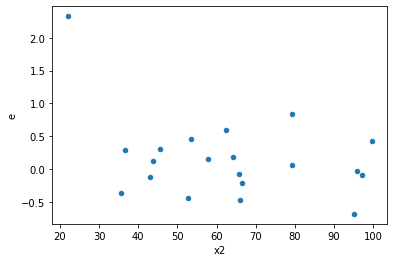

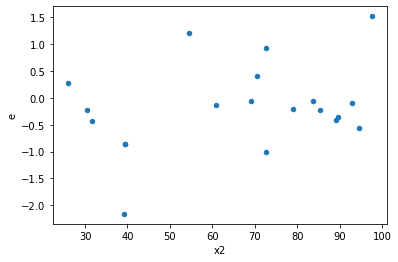

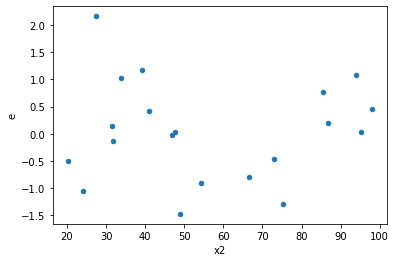

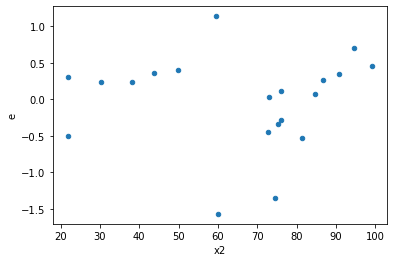

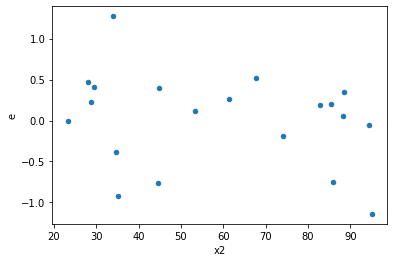

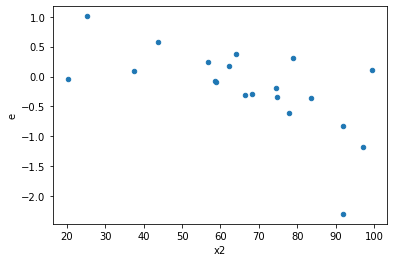

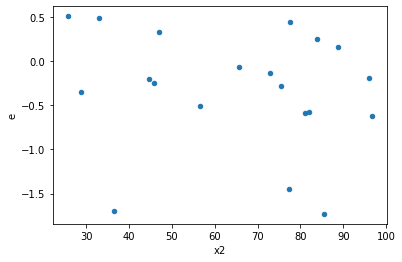

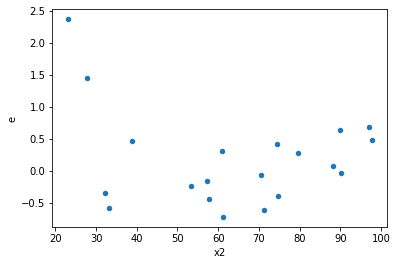

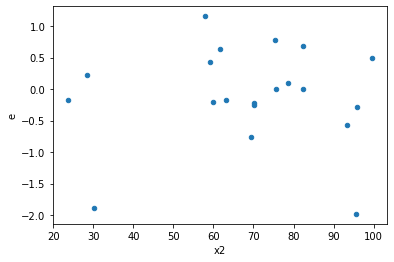

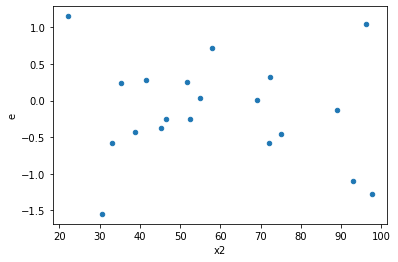

In [ ]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [ ]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,7.0,7.0,1.548162745853051,2.6590257558893633,0.25802712430884184,0.44317095931489386,1.7175363268570434,0.4923817126815073,0.7538091436592463,Reject001=1 : Homoscedasticity
8.0,6.0,8.0,1.4461119426146953,8.052914060088924,0.2892223885229391,1.1504162942984177,4.176499320063991,0.09842867978347991,0.95078566010826,Reject001=1 : Homoscedasticity
9.0,5.0,9.0,1.9421582233257866,4.681933383199391,0.48553955583144665,0.5852416728999239,1.3392699268977755,0.7832048952995958,0.6083975523502021,Reject001=1 : Homoscedasticity
10.0,7.0,7.0,0.5229837674655154,1.7449732716395336,0.08716396124425257,0.29082887860658896,3.3365725290022388,0.13444704917230932,0.9327764754138453,Reject001=1 : Homoscedasticity
12.0,8.0,6.0,0.46784602421077265,2.638278053737844,0.06683514631582467,0.5276556107475688,7.5189354822125685,0.011952880628317564,0.9940235596858412,Reject001=1 : Homoscedasticity
13.0,3.0,11.0,0.12381859688934588,2.4838623448684536,0.06190929844467294,0.24838623448684535,5.471044093249865,0.1882533091300138,0.9058733454349931,Reject001=1 : Homoscedasticity
14.0,8.0,6.0,2.6566560622872006,2.28716503356579,0.37952229461245723,0.457433006713158,1.1478916753199364,0.832320140020891,0.5838399299895545,Reject001=1 : Homoscedasticity
16.0,8.0,6.0,4.049105053235977,3.8235177047534554,0.578443579033711,0.764703540950691,1.2590494786653372,0.7419672291602635,0.6290163854198683,Reject001=1 : Homoscedasticity
20.0,6.0,8.0,1.6951099133630474,7.8597904000610335,0.33902198267260947,1.1228272000087192,3.4775578583872377,0.14622217334099785,0.9268889133295011,Reject001=1 : Homoscedasticity


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,1.548162745853051,2.6590257558893633,0.25802712430884184,0.44317095931489386,1.7175363268570434,0.4923817126815073,Reject001=1 : Homoscedasticity
1.0,9.0,5.0,7.6679125953388905,0.5054547711533713,0.9584890744173613,0.12636369278834284,0.11865270720862438,0.030271625478068692,Reject001=1 : Homoscedasticity
2.0,8.0,6.0,6.333191865603942,3.3139672395366393,0.9047416950862773,0.6627934479073279,0.6976928979598326,0.6797568921377848,Reject001=1 : Homoscedasticity
3.0,9.0,5.0,1.7297820277398395,0.30200418209382035,0.21622275346747993,0.07550104552345509,0.31426360029833517,0.21541561608696824,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,1.372624249563076,0.6694753515538601,0.22877070826051268,0.11157922525897668,0.48773388038785026,0.364203459585791,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,1.4151141098711058,1.3844564380088353,0.28302282197422113,0.19777949114411933,0.7337516609181453,0.6670812137942846,Reject001=1 : Homoscedasticity
6.0,5.0,9.0,2.7952669617316976,1.3642396545186088,0.6988167404329244,0.1705299568148261,0.2711407996277647,0.08597767139548938,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,3.135871139337524,1.9945543998529764,0.5226451898895873,0.3324257333088294,0.6360447579725297,0.5650834599515445,Reject001=1 : Homoscedasticity
8.0,6.0,8.0,1.4461119426146953,8.052914060088924,0.2892223885229391,1.1504162942984177,4.176499320063991,0.09842867978347991,Reject001=1 : Homoscedasticity


In [ ]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      941
Reject001=0 : Heteroscedasticity     59
Name: Result_test, dtype: int64